In [3]:
import cw07
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Classwork 07

Raha & Jack

10/11/18

## Instructions

First, go through the slides indicated in the README and place any code fragments to test in the following subsection. Second, go through the rest of the notebook, execute lines to test them, and complete the coding assignments.

### Slide Scratch Work

**None**

## Description

The following code benchmarks and plots functions approximated both as python lists and as numpy arrays.

### Module Documentation

For illustration, here is a reminder of how the python help system naturally uses the docstrings from the code.

In [2]:
help(cw07)

Help on module cw07:

NAME
    cw07

DESCRIPTION
    Classwork 07
    This classwork introduces numpy arrays and compares their performance to
    python lists.

FUNCTIONS
    gen_gaussian_array(a, b, n=1000)
        gen_gaussian_array(a, b, n=1000)
        Generate a discrete approximation of a Gaussian function, including its
        domain and range, stored as a pair of numpy arrays.
        
        Args:
            a (float) : Lower bound of domain
            b (float) : Upper bound of domain
            n (int, optional) : Number of points in domain, defaults to 1000.
        
        Returns:
            (x, g) : Pair of numpy arrays of float64
                x  : [a, ..., b] Array of n equally spaced float64 between a and b
                g  : [g(a), ..., g(b)] Array of Gaussian values matched to x
    
    gen_gaussian_list(a, b, n=1000)
        gen_gaussian_list(a, b, n=1000)
        Generate a discrete approximation of a Gaussian function, including its
        domain an

In [3]:
help(cw07.gen_gaussian_list)

Help on function gen_gaussian_list in module cw07:

gen_gaussian_list(a, b, n=1000)
    gen_gaussian_list(a, b, n=1000)
    Generate a discrete approximation of a Gaussian function, including its
    domain and range, stored as a pair of vanilla python lists.
    
    Args:
        a (float) : Lower bound of domain
        b (float) : Upper bound of domain
        n (int, optional) : Number of points in domain, defaults to 1000.
    
    Returns:
        (x, g) : Pair of lists of floats
            x  : [a, ..., b] List of n equally spaced floats between a and b
            g  : [g(a), ..., g(b)] List of Gaussian values matched to x



In [4]:
?cw07.gen_gaussian_array

Signature: cw07.gen_gaussian_array(a, b, n=1000)
Docstring:
gen_gaussian_array(a, b, n=1000)
Generate a discrete approximation of a Gaussian function, including its
domain and range, stored as a pair of numpy arrays.

Args:
    a (float) : Lower bound of domain
    b (float) : Upper bound of domain
    n (int, optional) : Number of points in domain, defaults to 1000.

Returns:
    (x, g) : Pair of numpy arrays of float64
        x  : [a, ..., b] Array of n equally spaced float64 between a and b
        g  : [g(a), ..., g(b)] Array of Gaussian values matched to x
File:      ~/classwork/cw07-big-team/cw07.py
Type:      function


### Python Lists

Benchmark and plot the reference list implementation.

#### Gaussian Function

In [5]:
%time x, g = cw07.gen_gaussian_list(-10,10,1000001)

CPU times: user 929 ms, sys: 57.3 ms, total: 986 ms
Wall time: 1.02 s


In [6]:
gauss = pd.DataFrame({"x":x,"g(x)":g})

In [7]:
gauss

,x,g(x)
0,-10.00000,7.694599e-23
1,-9.99998,7.696138e-23
2,-9.99996,7.697677e-23
3,-9.99994,7.699217e-23
4,-9.99992,7.700757e-23
5,-9.99990,7.702297e-23
6,-9.99988,7.703838e-23
7,-9.99986,7.705379e-23
8,-9.99984,7.706920e-23
9,-9.99982,7.708461e-23


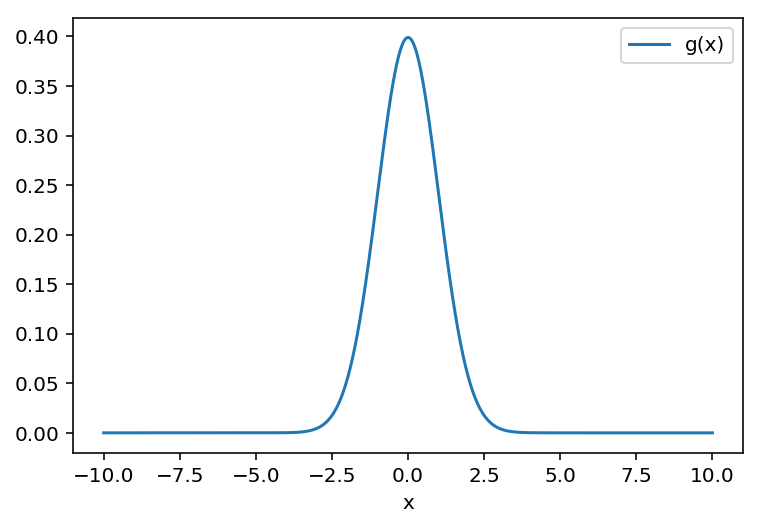

In [9]:
gauss.plot(x="x",y="g(x)")

#### Gaussian Function

In [10]:
%time x, g = cw07.gen_gaussian_array(-10, 10, 1000001)

CPU times: user 1.35 s, sys: 81.2 ms, total: 1.43 s
Wall time: 1.45 s


In [11]:
gauss = pd.DataFrame({"x":x,"g(x)":g})

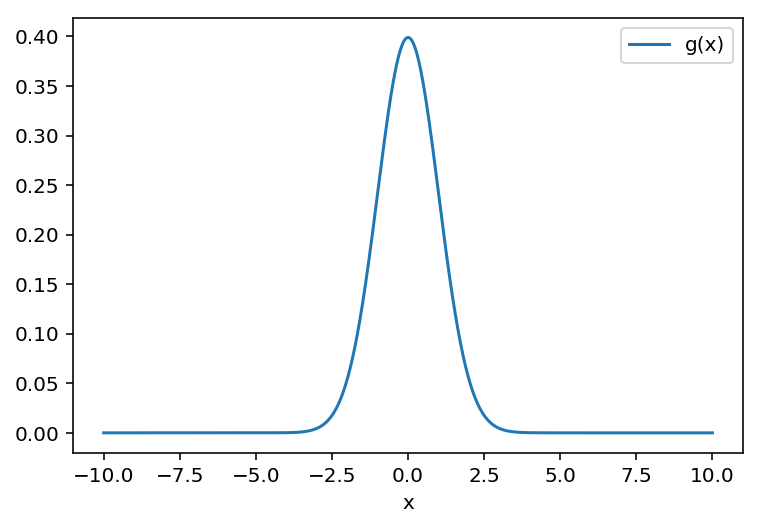

In [12]:
gauss.plot(x="x",y="g(x)")

#### Sinc Function

In [26]:
%time x1,y1 = cw07.gen_sinc_array(-10,10,100)
%time x2,y2 = cw07.gen_sinc_list(-10,10,100)

CPU times: user 238 µs, sys: 0 ns, total: 238 µs
Wall time: 239 µs
CPU times: user 592 µs, sys: 241 µs, total: 833 µs
Wall time: 848 µs


#### Sinf Function

In [27]:
%time x1,y1 = cw07.gen_sinf_array(-10,10,100)
%time x2,y2 = cw07.gen_sinf_list(-10,10,100)

AttributeError: module 'cw07' has no attribute 'gen_sinf_array'

AttributeError: module 'cw07' has no attribute 'gen_sinf_list'

## Conclusions

Place your conclusion about your investigations at the end in a well-written conclusion section.

# TESTING

Create both list and array implementations of the "sinc" function: $$ \text{sinc}(x) = \frac{\sin(x)}{x}.$$ Follow the style of the Gaussian function implementations for reference. Plot and benchmark the implementations in the notebook. Comment on how many points are needed per period of the "sinc" to obtain an accurate plot. (Hint: in the division you will need to skip the single point $x=0$. The where and out keyword arguments of numpy.divide may be useful here.

In [30]:
def sinc_array(a,b, n=1000):
    """gen_gaussian_array(a, b, n=1000)
    Generate values of a sinc function, including its
    domain and range, stored as a pair of numpy arrays.
    
    Args:
        a (float) : Lower bound of domain
        b (float) : Upper bound of domain
        n (int, optional) : Number of points in domain, defaults to 1000.
    
    Returns:
        (x, g) : Pair of numpy arrays of float64
            x  : [a, ..., b] Array of n equally spaced float64 between a and b
            g  : [g(a), ..., g(b)] Array of sinc values matched to x
    """
    x = np.linspace(a,b,n,endpoint=True)
    y = np.sin(x)
    y = np.divide(y,x,out=np.ones(n),where=x!=0)
    return x,y

def sinc_list(a,b, n=1000):
        """sinc_list(a, b, n=1000)
    Generate values of a sinc function, including its
    domain and range, stored as a pair of python lists.
    
    Args:
        a (float) : Lower bound of domain
        b (float) : Upper bound of domain
        n (int, optional) : Number of points in domain, defaults to 1000.
    
    Returns:
        (x, g) : Pair of lists of floats
            x  : [a, ..., b] List of n equally spaced floats between a and b
            g  : [g(a), ..., g(b)] List of sinc values matched to x
    """
        dx = (b-a)/(n-1)
        x = [a + k*dx for k in range(n)]
        y = []
        for element in x:
            if element != 0:
                y.append(math.sin(element)/element)
            else:
                y.append(1)
        return x,y

In [31]:
x1,y1 = sinc_array(a=0,b=10,n=20001)
x2,y2 = sinc_list(a=0,b=10,n=20001)

In [43]:
print(x)

[0.0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045000000000000005, 0.005, 0.0055, 0.006, 0.006500000000000001, 0.007, 0.0075, 0.008, 0.0085, 0.009000000000000001, 0.0095, 0.01, 0.0105, 0.011, 0.0115, 0.012, 0.0125, 0.013000000000000001, 0.0135, 0.014, 0.0145, 0.015, 0.0155, 0.016, 0.0165, 0.017, 0.0175, 0.018000000000000002, 0.0185, 0.019, 0.0195, 0.02, 0.0205, 0.021, 0.021500000000000002, 0.022, 0.0225, 0.023, 0.0235, 0.024, 0.0245, 0.025, 0.025500000000000002, 0.026000000000000002, 0.0265, 0.027, 0.0275, 0.028, 0.0285, 0.029, 0.029500000000000002, 0.03, 0.0305, 0.031, 0.0315, 0.032, 0.0325, 0.033, 0.0335, 0.034, 0.0345, 0.035, 0.035500000000000004, 0.036000000000000004, 0.0365, 0.037, 0.0375, 0.038, 0.0385, 0.039, 0.0395, 0.04, 0.0405, 0.041, 0.0415, 0.042, 0.0425, 0.043000000000000003, 0.043500000000000004, 0.044, 0.0445, 0.045, 0.0455, 0.046, 0.0465, 0.047, 0.0475, 0.048, 0.0485, 0.049, 0.0495, 0.05, 0.0505, 0.051000000000000004, 0.051500000000000004, 0.052000

In [44]:
y

[0.9999999583333338,
 0.9999998333333416,
 0.9999996250000421,
 0.9999993333334666,
 0.9999989583336588,
 0.999998500000675,
 0.9999979583345839,
 0.9999973333354667,
 0.9999966250034172,
 0.9999958333385416,
 0.9999949583409589,
 0.9999940000108,
 0.9999929583482088,
 0.9999918333533416,
 0.9999906250263672,
 0.9999893333674666,
 0.9999879583768336,
 0.999986500054675,
 0.9999849584012087,
 0.9999833334166665,
 0.999981625101292,
 0.9999798334553414,
 0.9999779584790834,
 0.9999760001727995,
 0.9999739585367831,
 0.9999718335713408,
 0.999969625276791,
 0.9999673336534651,
 0.999964958701707,
 0.9999625004218727,
 0.9999599588143311,
 0.9999573338794634,
 0.9999546256176631,
 0.9999518340293369,
 0.9999489591149032,
 0.9999460008747932,
 0.9999429593094509,
 0.9999398344193324,
 0.9999366262049063,
 0.999933334666654,
 0.999929959805069,
 0.999926501620658,
 0.9999229601139393,
 0.9999193352854442,
 0.9999156271357164,
 0.9999118356653123,
 0.9999079608748005,
 0.999904002764762,
 0.9

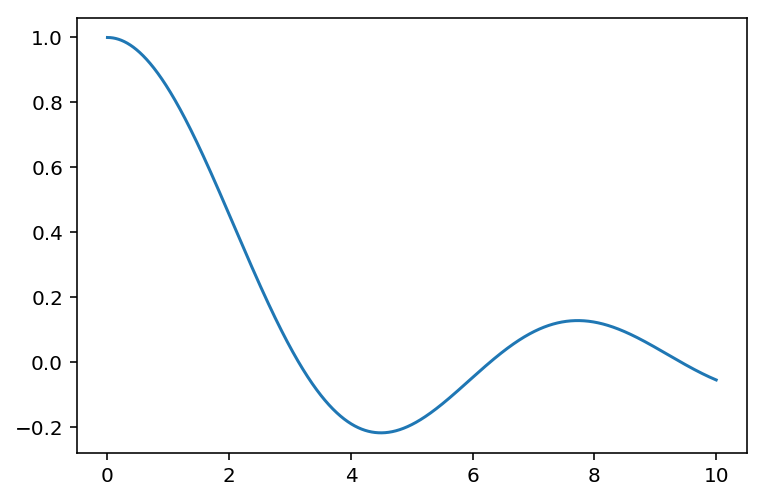

In [32]:
plt.plot(x1,y1)

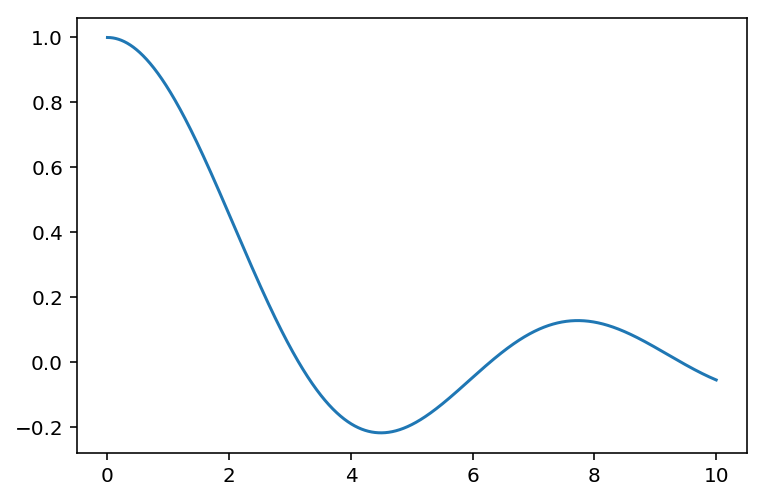

In [33]:
plt.plot(x2,y2)

Create both list and array implementations of a frequency-chirped sine wave: $$\text{sinf}(x) = \sin\left(\frac{1}{x}\right).$$ What difficulties are there in implementing this function? Comment on the how many points per period will be necessary to obtain an accurate plot.

In [34]:
def gen_sinf_array(a,b, n=1000):
    """gen_sinf_array(a, b, n=1000)
    Generate values of a sinf function, including its
    domain and range, stored as a pair of numpy arrays.
    
    Args:
        a (float) : Lower bound of domain
        b (float) : Upper bound of domain
        n (int, optional) : Number of points in domain, defaults to 1000.
    
    Returns:
        (x, g) : Pair of numpy arrays of float64
            x  : [a, ..., b] Array of n equally spaced float64 between a and b
            g  : [g(a), ..., g(b)] Array of sinc values matched to x
    """
    x = np.linspace(a,b,n,endpoint=True)
    y = np.sin(np.divide(1,x,out=np.ones(n),where=x!=0))
    return x,y

def gen_sinf_list(a,b, n=1000):
        """sinc_list(a, b, n=1000)
    Generate values of a sinf function, including its
    domain and range, stored as a pair of python lists.
    
    Args:
        a (float) : Lower bound of domain
        b (float) : Upper bound of domain
        n (int, optional) : Number of points in domain, defaults to 1000.
    
    Returns:
        (x, g) : Pair of lists of floats
            x  : [a, ..., b] List of n equally spaced floats between a and b
            g  : [g(a), ..., g(b)] List of sinc values matched to x"""
        dx = (b-a)/(n-1)
        x = [a + k*dx for k in range(n)]
        y = []
        for element in x:
            if element != 0:
                y.append(math.sin(1/element))
            else:
                y.append(0)
        return x,y

In [23]:
x1,y1 = gen_sinf_array(a=0,b=10,n=20000)
x2,y2 = gen_sinf_list(a=0,b=10,n=20000)

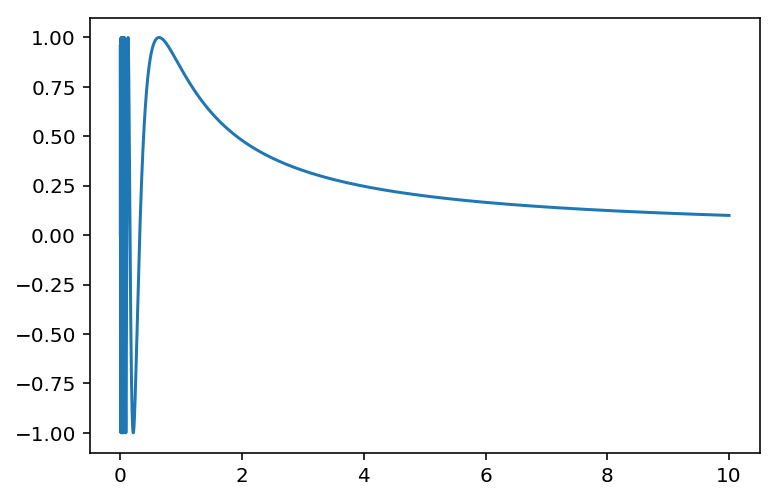

In [24]:
plt.plot(x1,y1)

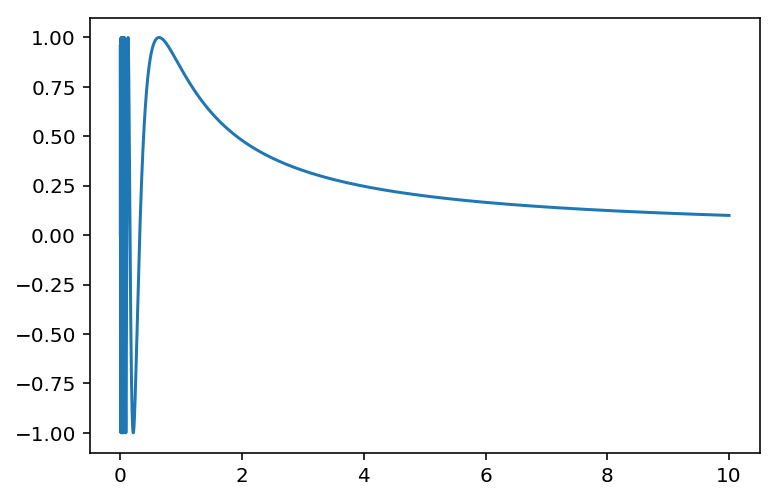

In [25]:
plt.plot(x2,y2)